# Finding boxes around the segmented image

The goal is to find the boundaries of each region of the segmented image and to draw a rectangular box around each region (in the ideal case we have the background and the digits).

In [1]:
import Segmentation as seg
from PIL import Image, ImageDraw, ImageColor

In [2]:
image_path = "../img/input/img-2020129-13428.png"
original_img = Image.open(image_path)

In [5]:
segmentation = seg.GraphBasedSegmentation(image_path)
segmentation.segment(k=4500, min_size=100, preprocessing=True, contrast=1.5, gaussian_blur=2.3)
segmentation.define_regions()
segmentation.generate_image()

Building graph...
Graph built in 0.881s.

Segmenting...
Segmentation done in 1.35s.

Removing componentes having size less than 100...
Removed components in 0.427s.

Defining regions...
Regions defined in 0.0722s.

Generating image...
Image generated in 0.165s.



In [6]:
segmented_img = segmentation.segmented_img
segmented_arr = segmentation.segmented_arr
components = segmentation.components
height, width = segmented_arr.shape

In [7]:
boundaries = {}

for i in range(components.num_components()):
    boundaries[i] = {
                    "min_row": height - 1,
                    "max_row": 0,
                    "min_col": width - 1,
                    "max_col": 0
                    }

In [8]:
for row in range(height):
    for col in range(width):
        min_row = boundaries[segmented_arr[row, col]]['min_row']
        max_row = boundaries[segmented_arr[row, col]]['max_row']
        min_col = boundaries[segmented_arr[row, col]]['min_col']
        max_col = boundaries[segmented_arr[row, col]]['max_col']
        if (row < min_row):
            boundaries[segmented_arr[row, col]]['min_row'] = row
        if (row > max_row):
            boundaries[segmented_arr[row, col]]['max_row'] = row
        if (col < min_col):
            boundaries[segmented_arr[row, col]]['min_col'] = col
        if (col > max_col):
            boundaries[segmented_arr[row, col]]['max_col'] = col


In [9]:
def find_boundaries(num_regions, segmented_arr):

    boundaries = {}
    height, width = segmented_arr.shape

    for i in range(num_regions):
        boundaries[i] = {
                        "min_row": height - 1,
                        "max_row": 0,
                        "min_col": width - 1,
                        "max_col": 0
                        }

    for row in range(height):
        for col in range(width):
            min_row = boundaries[segmented_arr[row, col]]['min_row']
            max_row = boundaries[segmented_arr[row, col]]['max_row']
            min_col = boundaries[segmented_arr[row, col]]['min_col']
            max_col = boundaries[segmented_arr[row, col]]['max_col']
            if (row < min_row):
                boundaries[segmented_arr[row, col]]['min_row'] = row
            if (row > max_row):
                boundaries[segmented_arr[row, col]]['max_row'] = row
            if (col < min_col):
                boundaries[segmented_arr[row, col]]['min_col'] = col
            if (col > max_col):
                boundaries[segmented_arr[row, col]]['max_col'] = col
    
    return boundaries


In [10]:
boundaries = find_boundaries(components.num_components(), segmented_arr)

In [11]:
copy = segmented_img.copy()
draw = ImageDraw.Draw(copy)

for region, points in boundaries.items():
    A = (points['min_col'], points['min_row'])
    B = (points['max_col'], points['min_row'])
    C = (points['max_col'], points['max_row'])
    D = (points['min_col'], points['max_row'])
    draw.line([A,B,C,D,A], fill='lightgreen', width=3)

    

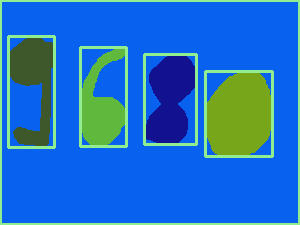

In [12]:
copy

In [ ]:
def draw_boxes(input_img):
    copy = input_img.copy()
    draw = ImageDraw.Draw(copy)

    for region, points in boundaries.items():
        A = (points['min_col'], points['min_row'])
        B = (points['max_col'], points['min_row'])
        C = (points['max_col'], points['max_row'])
        D = (points['min_col'], points['max_row'])
        draw.line([A,B,C,D,A], fill='lightgreen', width=3)
    
    return copy